# Part I: Building the Ngram model

### Step1: Loading the data
The current Harry Potter data is a text of 68228 lines.

In [1]:
# len(train_dataset)
import os
import nltk
from nltk import word_tokenize, sent_tokenize
import pickle
count_sign = '__COUNT__'

In [2]:
Path = "Data/"
filelist = os.listdir(Path)
textstring = str()
for file in filelist:
    print(file)
    if file.endswith(".txt"):  # You could also add "and i.startswith('f')
        with open(Path + file, 'r') as f:
            textstring += str(f.read()).lower()
# Here you can check (with regex, if, or whatever if the keyword is in the document.)

[0] SeverelySnaped - The Potions Masterâs Nephew - Unofficial Harry Potter fanfiction.txt
.ipynb_checkpoints
HarryPotter.txt
[0] SeverelySnaped - The Potions Masterâs Nephew - Unofficial Harry Potter fanfiction.txt
.ipynb_checkpoints
HarryPotter.txt


In [3]:
# train_dataset = load_dataset('wikitext','wikitext-103-v1',split='train')['text']
# eval_dataset = load_dataset('wikitext', 'wikitext-2-raw-v1', split='validation')['text']
# test_dataset = load_dataset('wikitext', 'wikitext-2-raw-v1', split='test')['text']
# with open("HarryPotter.txt", "r", encoding='utf-8') as f:
#     text_string = str(f.read()).lower()

### Step2: Preprocessing the data

In [4]:
# def get_tokenized_sentences(string):
#     tokenized_sentence_list=[]
#     sentences = sent_tokenize(string)
#     for sentence in sentences:
#         list_of_words = word_tokenize(sentence)
# #don't incude the short ones
#         if len(list_of_words) > 2:
#             tokenized_sentence_list.append(list_of_words)
#     return tokenized_sentence_list

In [5]:
# tokenized_sentence_list = get_tokenized_sentences(textstring)

In [6]:
# print(len(tokenized_sentence_list))

In [7]:
filename = 'TokenizedSentences'
# outfile = open(filename,'wb')
# pickle.dump(tokenized_sentence_list,outfile)
# outfile.close()

In [8]:
infile = open(filename,'rb')
tokenized_sentence_list = pickle.load(infile)
infile.close()

In [9]:
# we only need train and validation %, test is the remainder
from utils import train_validation_test_split

train_set, eval_set, test_set = train_validation_test_split(tokenized_sentence_list,94, 6)
print("split 98/2:\n",f"train data:{len(train_set)}\n", f"validation data:{len(eval_set)}\n")

split 98/2:
 train data:68228
 validation data:4355

split 98/2:
 train data:68228
 validation data:4355



In [10]:
train_name = 'train_dataset'
eval_name = 'eval_dataset'

In [11]:
wc=0
for sentence in tokenized_sentence_list:
    wc+=1
print(wc)

72584
72584


In [12]:
# outfile = open(train_name, 'wb')
# pickle.dump(train_set,outfile)
# outfile.close()

In [13]:
# outfile = open(eval_name, 'wb')
# pickle.dump(eval_set,outfile)
# outfile.close()

### Step3: Count

In [14]:
from utils import single_pass_trigram_count, AssignProbSent, plot_minimal_pair

In [15]:
root = single_pass_trigram_count(train_set)

5000 sentences have been processed. Now we're at ['<s>', '<s>', 'standing', 'a', 'mere', 'ten', 'paces', 'from', 'the', 'boy', ',', 'voldemort', 'stopped', '.', '</s>'].
There are now 8459 vocabs in the dictionary.
5000 sentences have been processed. Now we're at ['<s>', '<s>', 'standing', 'a', 'mere', 'ten', 'paces', 'from', 'the', 'boy', ',', 'voldemort', 'stopped', '.', '</s>'].
There are now 8459 vocabs in the dictionary.
10000 sentences have been processed. Now we're at ['<s>', '<s>', 'the', 'massive', 'specimen', 'that', 'was', 'carrying', 'harry', 'made', 'its', 'way', 'down', 'the', 'steep', 'slope', 'toward', 'a', 'misty', ',', 'domed', 'web', 'in', 'the', 'very', 'center', 'of', 'the', 'hollow', ',', 'while', 'its', 'fellows', 'closed', 'in', 'all', 'around', 'it', ',', 'clicking', 'their', 'pincers', 'excitedly', 'at', 'the', 'sight', 'of', 'its', 'load', '.', '</s>'].
There are now 11812 vocabs in the dictionary.
10000 sentences have been processed. Now we're at ['<s>', '<s

**Uncomment the cell below to save the model as a binary file**

In [16]:
# filename = 'TrieRoot'
# outfile = open(filename,'wb')
# pickle.dump(root,outfile)
# outfile.close()

In [17]:
# infile = open(filename, 'rb')
# root = pickle.load(infile)
# infile.close()

In [18]:
print(len(root))

25998
25998


In [19]:
# # get the unigram in a simpler dicionary
# unigram_count_dict = single_pass_unigram_count(train_set)
# # get the ngram in a more complex dictionary(n=2)
# prefixes, vocabulary, count_dict = single_pass_ngram_count_matrix(2, train_set)

In [20]:
# def good_turing_smoothing_unigram(unigram_count):

#     N0 = len(unigram_count)
#     N1 = 0
#     for value in unigram_count.values():
#         if value == 1:
#             N1+=1
#     unk_count = N1/N0
#     unigram_count['<unk>'] = unk_count
#     return unigram_count
# unigram_count_dict = good_turing_smoothing_unigram(unigram_count_dict)

# print(f'The effective count of un seen word is:', unigram_count_dict['<unk>'])
# print(f'There are {len(unigram_count_dict)} unigrams in the count dictionary')

# # assign possibility to unseen ngrams
# def good_turing_smoothing_ngram(N, ngram_count, vocabulary):
#     # good turing smoothing
#     N0 = len(vocabulary)**N - len(ngram_count)
#     N1 = 0
#     for value in ngram_count.values():
#         if value == 1:
#             N1+=1
#     unk_count = N1/N0
#     ngram_count['<unk>'] = unk_count
#     return ngram_count

# bigram_count = good_turing_smoothing_ngram(2, count_dict, vocabulary)

# # verify the count has been smoothed
# # print(count_dict['<unk>'])
# bigram_count = good_turing_smoothing_ngram(2, count_dict, vocabulary)
# print(f'Theere are {len(bigram_count)} bigrams in the count dictionary')
# print('The effective count for unseen bigram is:',bigram_count['<unk>'])

# Part II: Evaluating the model(metrics : perplexity)

**Brew style plot of probability descension visualisation**

In [21]:
sentence1 = eval_set[525]
# sentence1 = ['is', 'that', 'why', 'you', 'dyed', 'your', 'eyebrow', ',', 'for', 'the', 'party', '?']
sentence2 = eval_set[837]
# sentence2 = ['they', 'continued', 'to', 'circle', 'each', 'other', 'like', 'wolves', 'about', 'to', 'tear', 'each', 'other', 'apart', '.']
print(sentence1)
print(sentence2)
# log_prob_array = Assign_probability_trigram(sentence1, root, unk3)
# print(log_prob_array)

['“', 'i', 'didn', '’', 't', 'realize', 'you', 'knew', 'professor', 'dumbledore', 'so', 'well.', '”', '“', 'as', 'well', 'as', 'anyone', ',', '”', 'said', 'doge', ',', 'dabbing', 'his', 'eyes', 'with', 'a', 'napkin', '.']
['griphook', 'did', 'not', 'protest', ',', 'but', 'harry', 'thought', 'he', 'saw', 'resentment', 'in', 'the', 'goblin', '’', 's', 'eyes', 'as', 'he', 'closed', 'the', 'door', 'upon', 'him', '.']
['“', 'i', 'didn', '’', 't', 'realize', 'you', 'knew', 'professor', 'dumbledore', 'so', 'well.', '”', '“', 'as', 'well', 'as', 'anyone', ',', '”', 'said', 'doge', ',', 'dabbing', 'his', 'eyes', 'with', 'a', 'napkin', '.']
['griphook', 'did', 'not', 'protest', ',', 'but', 'harry', 'thought', 'he', 'saw', 'resentment', 'in', 'the', 'goblin', '’', 's', 'eyes', 'as', 'he', 'closed', 'the', 'door', 'upon', 'him', '.']


In [22]:
# print(root['motioned'])

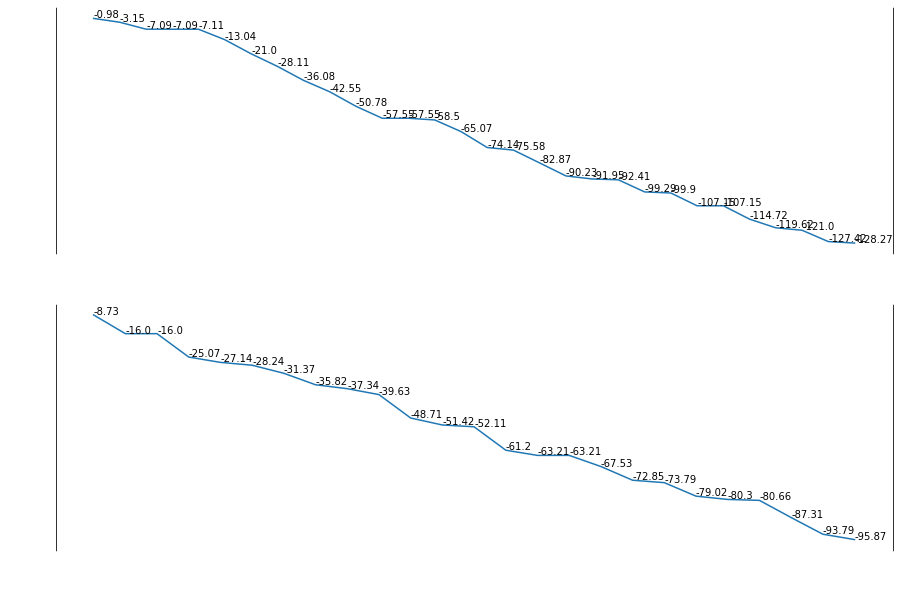

================	===============	===============	===============	===============	

This is a plot illustrating how the probability of the test sentence: 

 ['“', 'i', 'didn', '’', 't', 'realize', 'you', 'knew', 'professor', 'dumbledore', 'so', 'well.', '”', '“', 'as', 'well', 'as', 'anyone', ',', '”', 'said', 'doge', ',', 'dabbing', 'his', 'eyes', 'with', 'a', 'napkin', '.']

and its miminal pair: 

['griphook', 'did', 'not', 'protest', ',', 'but', 'harry', 'thought', 'he', 'saw', 'resentment', 'in', 'the', 'goblin', '’', 's', 'eyes', 'as', 'he', 'closed', 'the', 'door', 'upon', 'him', '.'] 

declines as the the algorithm process each word


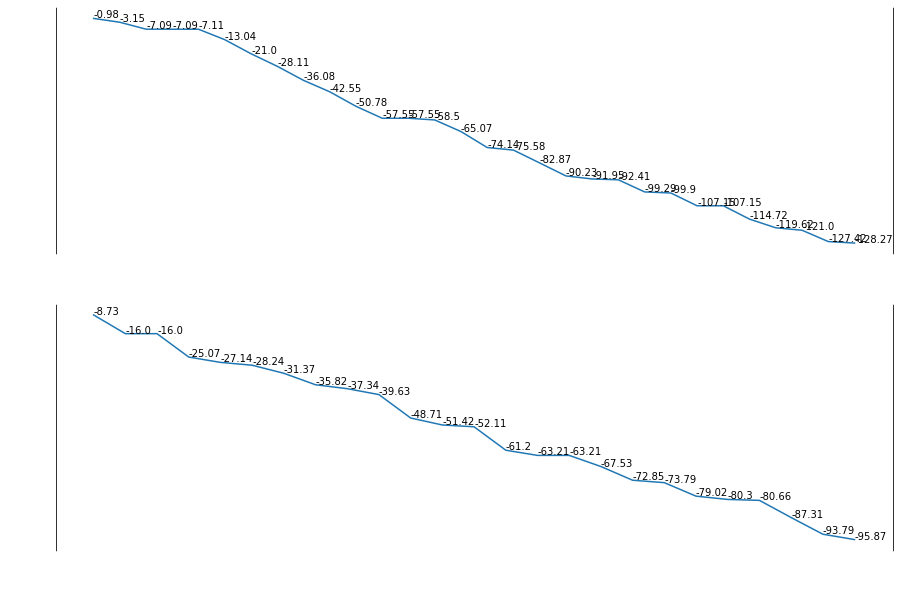

================	===============	===============	===============	===============	

This is a plot illustrating how the probability of the test sentence: 

 ['“', 'i', 'didn', '’', 't', 'realize', 'you', 'knew', 'professor', 'dumbledore', 'so', 'well.', '”', '“', 'as', 'well', 'as', 'anyone', ',', '”', 'said', 'doge', ',', 'dabbing', 'his', 'eyes', 'with', 'a', 'napkin', '.']

and its miminal pair: 

['griphook', 'did', 'not', 'protest', ',', 'but', 'harry', 'thought', 'he', 'saw', 'resentment', 'in', 'the', 'goblin', '’', 's', 'eyes', 'as', 'he', 'closed', 'the', 'door', 'upon', 'him', '.'] 

declines as the the algorithm process each word


In [23]:
# visually verify the implementation of probability assignment algorithm
plot_minimal_pair(sentence1,sentence2,root,AssignProbSent)

In [24]:
# print(root['like'])

In [25]:
from utils import calculating_perplexity

In [26]:
model_perplexity=calculating_perplexity(eval_set, root)

horseback and head-juggling are 2 consecutive unk word in ['as', 'horseback', 'head-juggling']
horseback and head-juggling are 2 consecutive unk word in ['as', 'horseback', 'head-juggling']
introductory and spiel are 2 consecutive unk word in ['his', 'introductory', 'spiel']
introductory and spiel are 2 consecutive unk word in ['his', 'introductory', 'spiel']
verbal and replays are 2 consecutive unk word in ['the', 'verbal', 'replays']
verbal and replays are 2 consecutive unk word in ['the', 'verbal', 'replays']
seductive and scents are 2 consecutive unk word in ['most', 'seductive', 'scents']
alberic and grunnion are 2 consecutive unk word in [',', 'alberic', 'grunnion']
seductive and scents are 2 consecutive unk word in ['most', 'seductive', 'scents']
alberic and grunnion are 2 consecutive unk word in [',', 'alberic', 'grunnion']
detachable and cribbing are 2 consecutive unk word in [',', 'detachable', 'cribbing']
ever-bashing and boomerangs are 2 consecutive unk word in ['and', 'eve

In [41]:
print(model_perplexity)

175.1
175.1


In [42]:
print(4)

4
4


In [28]:
# print(root[])

# Part III Experimenting with sentences with long distance dependency(LDD)

In [29]:
# # find sentences with long term dependencies.
# def find_LDD(sentences):
#     LDD_sentence_list = []
#     for sentence in sentences:
#         for each in ['is','are','which','her','him','it','me', 'himself','itself','herself','was','were']:
# #         for each in ['which', 'what', 'where','when', 'how', 'himself', 'herself', 'itself']:
#             if each in sentence and sentence not in LDD_sentence_list:
#                 LDD_sentence_list.append(sentence)
#     return LDD_sentence_list

In [30]:
# LDD_sentences = find_LDD(eval_set)
# print(len(LDD_sentences))

In [31]:
# filename = 'sdfghe'
# outfile = open(filename,'wb')
# pickle.dump(LDD_sentences, outfile)
# outfile.close()

In [32]:
# for _ in range (len(LDD_sentences)):
#     print(f'\n sentence number {_}\n\n', LDD_sentences[_], end='\n\n')

**LDD_senteces are sentences that emobdies LDDs**

In [33]:
# calculating_perplexity(LDD_sentences, bigram_count, unigram_count_dict)

# others =[]
# for sentence in eval_set:
#     if sentence not in LDD_sentences:
#         others.append(sentence)


# __Other sentences don't have key words such as what__

# calculating_perplexity(others, bigram_count, unigram_count_dict)

# x=np.array(list(unigram_count_dict.values()))
# mean_freq = round(np.mean(x))

# for each in ['which', 'what', 'where','when', 'how', 'himself', 'herself', 'itself']:
# # if..... then: x dependency still encoded by the model, despite its bvious limitations
# #  propose some test sentences by examining the sub sets: see num(words) separate the filler n gap 
# #  minimal paris;  brittleness, how does it degrade
# # verbs take specific types of objects (another test)
# # design probing tests
# # controll specific lexical prob; e.g. I am a man(prob = x)  -> * I is a man(prob = x') is x' < x? (if so, exclude the contribution of unigram prob)
# #  Is it COMPLETELY useless.

#     print(f'{each}\t appeared ',unigram_count_dict[each], 'times')
# print(f'\nwhereas the mean frequency of words is {mean_freq}')

In [34]:
def how_many_trigrams_are_there(model):
    cnt=0
    tri = []
    for key0 in model.keys():
        if key0 == count_sign:
            continue
        else:
            for key1 in model[key0].keys():
                if key1 == count_sign:
                    continue
                else:
                    for key2 in model[key0][key1].keys():
                        if key2 == count_sign:
                            continue
                        else:
                            cnt+=1
                            tri.append((key0+' '+key1+' '+key2,model[key0][key1][key2]))
        
    return cnt, tri

In [35]:
x,_ = how_many_trigrams_are_there(root)

In [36]:
x

738312

738312

In [37]:
x/len(root)**2

0.0010923455614926228

0.0010923455614926228